In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [2]:
def ham_ssh(v,w,kl):
    vals = []
    for k in kl:
        H = np.array([[0, v+w*np.exp(-1j*k)],[v+w*np.exp(1j*k), 0]])
        val = lin.eigvalsh(H)
        vals.append(val)
    return vals

def dxdy(v,w,kl):
    return (v+w*np.cos(kl),w*np.sin(kl))

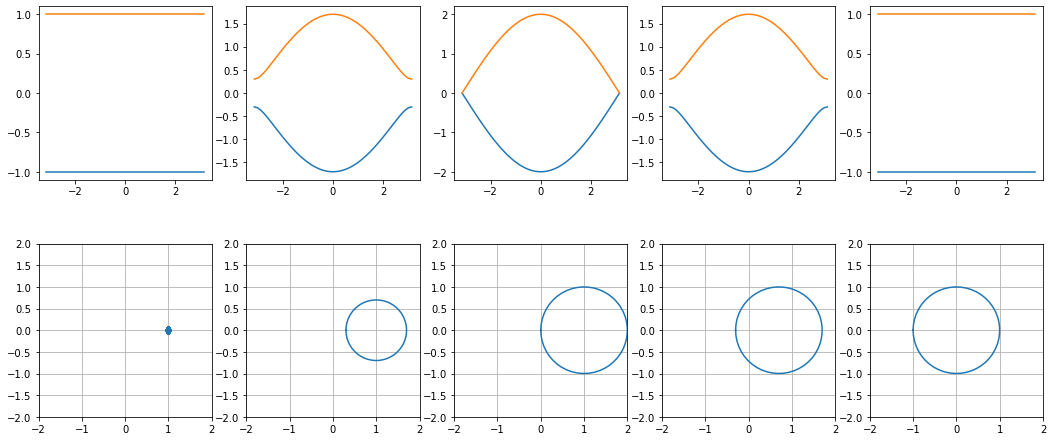

In [94]:
klist=np.linspace(-np.pi,np.pi)

fig = plt.figure(figsize=[18,8]);
ax1 = plt.subplot(251)
ax1.set_box_aspect(1)
ax1.plot(klist, ham_ssh(1,0,klist))

ax2 = plt.subplot(252)
ax2.set_box_aspect(1)
ax2.plot(klist, ham_ssh(1,0.7,klist))

ax3 = plt.subplot(253)
ax3.set_box_aspect(1)
ax3.plot(klist, ham_ssh(1,1,klist))

ax4 = plt.subplot(254)
ax4.set_box_aspect(1)
ax4.plot(klist, ham_ssh(0.7,1,klist))

ax5 = plt.subplot(255)
ax5.set_box_aspect(1)
ax5.plot(klist, ham_ssh(0,1,klist))

ax6 = plt.subplot(256)
ax6.set_box_aspect(1)
ax6.plot(dxdy(1,0,klist)[0],dxdy(1,0,klist)[1], marker='d')
ax6.set_xlim([-2,2])
ax6.set_ylim([-2,2])
plt.grid()

ax7 = plt.subplot(257)
ax7.set_box_aspect(1)
ax7.plot(dxdy(1,0.7,klist)[0],dxdy(1,0.7,klist)[1])
ax7.set_xlim([-2,2])
ax7.set_ylim([-2,2])
plt.grid()

ax8 = plt.subplot(258)
ax8.set_box_aspect(1)
ax8.plot(dxdy(1,1,klist)[0],dxdy(1,1,klist)[1])
ax8.set_xlim([-2,2])
ax8.set_ylim([-2,2])
plt.grid()

ax9 = plt.subplot(259)
ax9.set_box_aspect(1)
ax9.plot(dxdy(0.7,1,klist)[0],dxdy(0.7,1,klist)[1])
ax9.set_xlim([-2,2])
ax9.set_ylim([-2,2])
plt.grid()

ax0 = plt.subplot(2,5,10)
ax0.set_box_aspect(1)
ax0.plot(dxdy(0,1,klist)[0],dxdy(0,1,klist)[1])
ax0.set_xlim([-2,2])
ax0.set_ylim([-2,2])
plt.grid()

fig.savefig('../fig/fig1-2.png')

In [2]:
def mat_edge(v,w,L):
    idL=np.eye(L); # identity matrix of dimension L
    odL=np.diag(np.ones(L-1),1);# upper off diagonal matrix with ones of size L
    U=np.matrix([[0,1],[1,0]]) # intracell
    T=np.matrix([[0,0],[1,0]]) # intercell
    return np.kron(idL,v*U)+np.kron(odL,w*T)+np.kron(odL,w*T).H

In [28]:
L=10;      # Number of unitcells to take
dat=[];
vecdat=[];
vran=np.linspace(0,3,100) # This array contains the v values
                       # we evaluate the spectrum for.
for v in vran:
    w=1.0;
    H=mat_edge(v,w,L)
    eigdat=lin.eigh(H);      # for a given v here vi calculate the eigensystem (values and vectors)
    dat.append(eigdat[0]);
    vecdat.append(eigdat[1]);
    
dat=np.reshape(dat,[len(vran),2*L]);          # rewraping the data
vecdat=np.reshape(vecdat,[len(vran),2*L,2*L]) # to be more digestable
vecdat = np.power(vecdat,2)



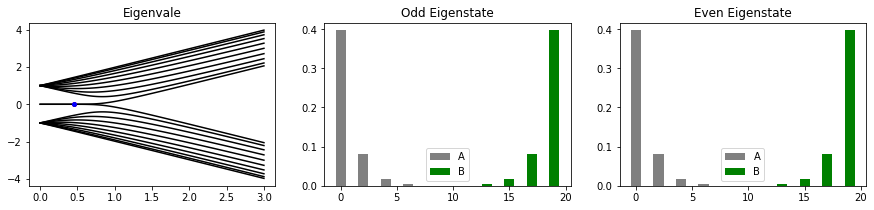

In [10]:
vi1 =15
n1 =10
vi2 =15
n2 =9

plt.figure(figsize=[15,3])
plt.subplot(131)
plt.plot(vran,dat,'k');
plt.plot(vran[vi1],dat[vi1,n1],'ro',markersize=4)
plt.plot(vran[vi2],dat[vi2,n2],'bo',markersize=4)
plt.title('Eigenvale')

plt.subplot(132)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi1][0::2,n1].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi1][1::2,n1].T)),0.9,color='green',label='B') # sublattice B
plt.title('Odd Eigenstate')
plt.legend()

plt.subplot(133)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi2][0::2,n2].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi2][1::2,n2].T)),0.9,color='green',label='B') # sublattice B
plt.title( 'Even Eigenstate')
plt.legend()


# plt.savefig('../fig/fig1-4.png')

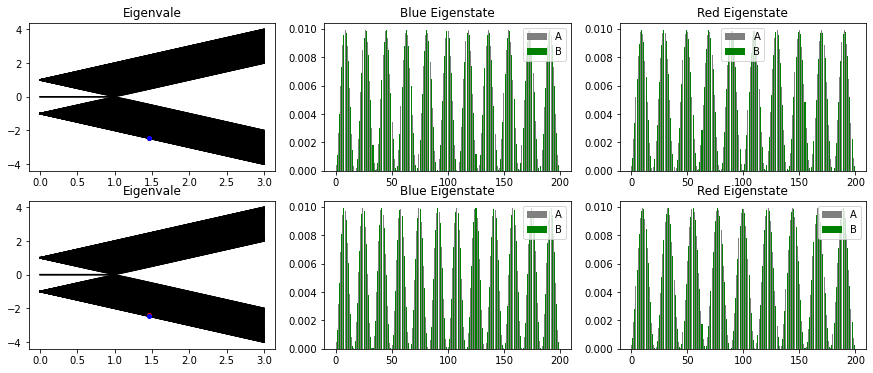

In [24]:
vi1 =10
n1 =10
vi2 =10
n2 =9

vi1 =48
n3 =11
vi2 =48
n4 =8


plt.figure(figsize=[15,6])
plt.subplot(231)
plt.plot(vran,dat,'k');
plt.plot(vran[vi1],dat[vi1,n1],'ro',markersize=4)
plt.plot(vran[vi2],dat[vi2,n2],'bo',markersize=4)
plt.title('Eigenvale')

plt.subplot(232)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi1][0::2,n1].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi1][1::2,n1].T)),0.9,color='green',label='B') # sublattice B
plt.title('Blue Eigenstate')
plt.legend()

plt.subplot(233)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi2][0::2,n2].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi2][1::2,n2].T)),0.9,color='green',label='B') # sublattice B
plt.title( 'Red Eigenstate')
plt.legend()

plt.subplot(234)
plt.plot(vran,dat,'k');
plt.plot(vran[vi1],dat[vi1,n3],'ro',markersize=4)
plt.plot(vran[vi2],dat[vi2,n4],'bo',markersize=4)
plt.title('Eigenvale')

plt.subplot(235)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi1][0::2,n3].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi1][1::2,n3].T)),0.9,color='green',label='B') # sublattice B
plt.title('Blue Eigenstate')
plt.legend()

plt.subplot(236)
plt.bar(np.array(range(0,2*L,2)),  np.real(np.array(vecdat[vi2][0::2,n4].T)),0.9,color='gray',label='A')  # sublattice A
plt.bar(np.array(range(0,2*L,2))+1,np.real(np.array(vecdat[vi2][1::2,n4].T)),0.9,color='green',label='B') # sublattice B
plt.title( 'Red Eigenstate')
plt.legend()
# plt.savefig('../fig/fig1-5_add.png')